# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [21]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [22]:
sales = pd.read_csv(r"C:\Users\jk102\OneDrive - 이화여자대학교\바탕 화면\이화여자대학교\ESAA\ESAA_week_13_2\product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [23]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [24]:
#모델 생성
kmeans = KMeans(n_clusters=3, random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [25]:
# 숫자형 데이터만 선택
scale = sales.select_dtypes(include=['int64', 'float64'])

kmeans.fit(scale)
pred = kmeans.predict(scale)

c:\Users\jk102\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [26]:
# 2-3) 예측된 군집 레이블 추가
sales['cluster'] = pred

## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [27]:
salesDF = sales.drop(columns=['cluster'])

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [28]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components=2)
pca_result = pca.fit_transform(salesDF)


#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x'] = pca_result[:, 0]
sales['pca_y'] = pca_result[:, 1]

3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

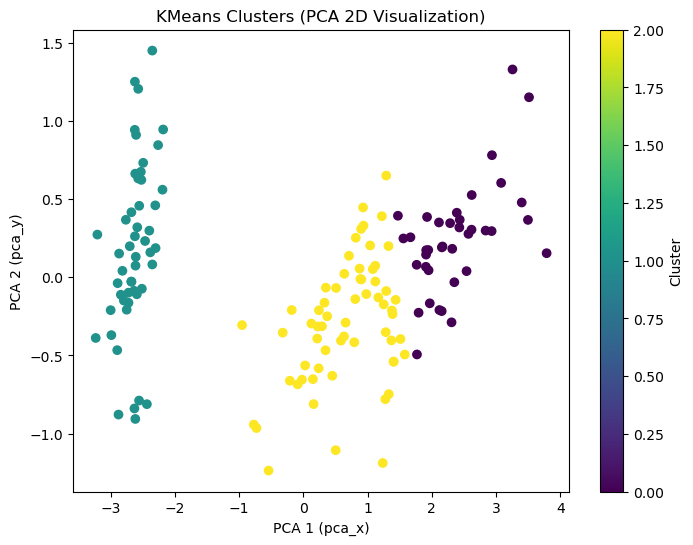

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(
    sales['pca_x'],
    sales['pca_y'],
    c=sales['cluster'],   # 군집별 색상 분리
    cmap='viridis'
)

plt.xlabel('PCA 1 (pca_x)')
plt.ylabel('PCA 2 (pca_y)')
plt.title('KMeans Clusters (PCA 2D Visualization)')
plt.colorbar(label='Cluster')
plt.show()


## 4) 군집평가: 실루엣 계수 구하기

In [30]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [36]:
#sales의 모든 데이터에 실루엣 계수 구하기
sil_values = silhouette_samples(sales_data, sales['cluster'])

In [37]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette'] = sil_values

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [41]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
silhouette_mean = sales['silhouette'].mean()
print("전체 평균 실루엣 계수:", silhouette_mean)

전체 평균 실루엣 계수: 0.538044239952023


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [40]:
#군집별 평균 실루엣 계수 구하기
cluster_mean = sales.groupby('cluster')['silhouette'].mean()
print("군집별 평균 실루엣 계수:")
print(cluster_mean)

군집별 평균 실루엣 계수:
cluster
0    0.450677
1    0.755123
2    0.416528
Name: silhouette, dtype: float64
